In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

#required for plotting maps
from mpl_toolkits.basemap import Basemap
from matplotlib.colors import rgb2hex
from matplotlib.patches import Polygon

#required for plotting chord diagrams
import plotly.plotly as py
from plotly.graph_objs import *
from plotly.offline import download_plotlyjs, init_notebook_mode, iplot
init_notebook_mode(connected=True)

#required for plotting spider charts
from matplotlib.path import Path
from matplotlib.spines import Spine
from matplotlib.projections.polar import PolarAxes
from matplotlib.projections import register_projection

#required for plotting nightingale charts
from matplotlib.patches import Wedge

# Intro example

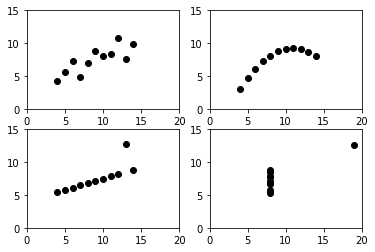

In [2]:
X1 = np.array([[10., 8., 13., 9., 11., 14., 6., 4., 12., 7., 5.], [8.04, 6.95, 7.58, 8.81, 8.33, 9.96, 7.24, 4.26, 10.84, 4.82, 5.68]])
X2 = np.array([[10., 8., 13., 9., 11., 14., 6., 4., 12., 7., 5.], [9.14, 8.14, 8.74, 8.77, 9.26, 8.10, 6.13, 3.10, 9.13, 7.26, 4.74]])
X3 = np.array([[10., 8., 13., 9., 11., 14., 6., 4., 12., 7., 5.], [7.46, 6.77, 12.74, 7.11, 7.81, 8.84, 6.08, 5.39, 8.15, 6.42, 5.73]])
X4 = np.array([[8., 8., 8., 8., 8., 8., 8., 19., 8., 8., 8.], [6.58, 5.76, 7.71, 8.84, 8.47, 7.04, 5.25, 12.50, 5.56, 7.91, 6.89]])

fig = plt.figure(1)

ax = fig.add_subplot(2,2,1)
plt.scatter(X1[0], X1[1], color='k')
fig.add_subplot(2,2,2, sharex=ax, sharey=ax)
plt.scatter(X2[0], X2[1], color='k')
fig.add_subplot(2,2,3, sharex=ax, sharey=ax)
plt.scatter(X3[0], X3[1], color='k')
fig.add_subplot(2,2,4, sharex=ax, sharey=ax)
plt.scatter(X4[0], X4[1], color='k')

plt.xlim([0, 20])
plt.ylim([0, 15])
plt.show()

# Outlier detection

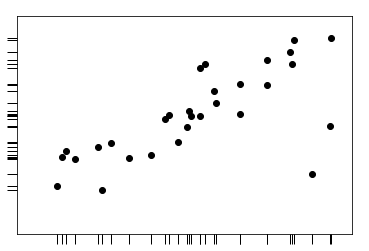

In [3]:
X = np.array([[9., 10., 11., 13., 18., 19., 21., 25., 30., 33., 34., 36., 38., 38.5, 39., 41., 41., 42., 44., 44.5, 50., 50., 56., 56., 61., 61.5, 62., 66., 70., 70.25], [12., 19.5, 21., 19., 22., 11., 23., 19.25, 20., 29., 30., 23.25, 27., 31., 29.75, 29.75,42., 43., 36., 33., 38., 30.25, 37.75, 44., 46., 43., 49., 15., 27.25, 49.5]])

ax = plt.axes()
ax.scatter(X[0], X[1], color='k')
ax.set_xticks(X[0], minor=True)
ax.set_yticks(X[1], minor=True)
ax.xaxis.tick_bottom()
ax.yaxis.tick_left()
plt.tick_params(which='minor', width=1, length=10)
plt.tick_params(which='major', width=0, length=0)
plt.tick_params(labelbottom=False, labelleft=False)
plt.xlim([0, 75])
plt.ylim([0, 55])
plt.show()

# Nonsensical model

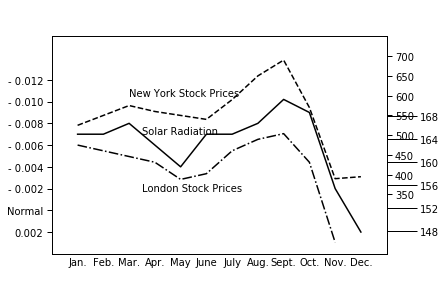

In [4]:
X1 = np.array([[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], [-0.007, -0.007, -0.008, -0.006, -0.004, -0.007, -0.007, -0.008, -0.0102, -0.009, -0.002, 0.002]])
X2 = np.array([[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], [525., 550., 575., 560., 550., 540., 590., 650., 690., 570., 390., 395.]])
X3 = np.array([[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11], [163., 162., 161., 160., 157., 158., 162., 164., 165., 160., 146.]])

ax1 = plt.axes()
ax1.plot(X1[0], X1[1], 'k-')
ax1.set_ylim([-0.016, 0.004])
ax1.set_yticks([-0.012, -0.010, -0.008, -0.006, -0.004, -0.002, 0., 0.002], minor=True)
ax1.set_yticklabels(['- 0.012', '- 0.010', '- 0.008', '- 0.006', '- 0.004', '- 0.002', 'Normal', '0.002'], minor=True)
ax1.invert_yaxis()
ax1.tick_params(which='minor', width=1, length=5)
ax1.tick_params(which='major', width=0, length=0)
ax1.tick_params(which='minor', direction='out')
ax1.text(3.5, -0.007, 'Solar Radiation')

ax2 = ax1.twinx()
ax2.plot(X2[0], X2[1], 'k--')
ax2.set_ylim([200, 750])
ax2.set_yticks([350, 400, 450, 500, 550, 600, 650, 700], minor=True)
ax2.set_yticklabels([350, 400, 450, 500, 550, 600, 650, 700], minor=True)
ax2.tick_params(which='minor', width=1, length=5)
ax2.tick_params(which='major', width=0, length=0)
ax2.tick_params(which='minor', direction='out')
ax2.text(3, 600, 'New York Stock Prices')

ax3 = ax1.twinx()
ax3.plot(X3[0], X3[1], 'k-.')
ax3.set_ylim([144, 182])
ax3.set_yticks([148, 152, 156, 160, 164, 168], minor=True)
ax3.set_yticklabels([148, 152, 156, 160, 164, 168], minor=True)
ax3.tick_params(which='minor', width=1, length=30)
ax3.tick_params(which='major', width=0, length=0)
ax3.tick_params(which='minor', direction='out')
ax3.text(3.5, 155, 'London Stock Prices')

plt.xlim([0, 13])
plt.xticks(np.arange(12)+1, ['Jan.', 'Feb.', 'Mar.', 'Apr.', 'May', 'June', 'July', 'Aug.', 'Sept.', 'Oct.', 'Nov.', 'Dec.'])
plt.setp(ax1.get_ymajorticklabels(), visible=False)
plt.setp(ax2.get_ymajorticklabels(), visible=False)
plt.setp(ax3.get_ymajorticklabels(), visible=False)
plt.show()

# Data map

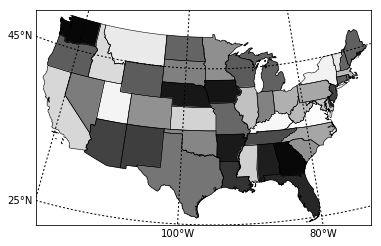

In [5]:
# This example is a slightly modified version of https://github.com/matplotlib/basemap/blob/master/examples/fillstates.py
m = Basemap(llcrnrlon=-119, llcrnrlat=22, urcrnrlon=-64, urcrnrlat=49, projection='lcc', lat_1=33, lat_2=45, lon_0=-95)
shape_info = m.readshapefile('data/st99_d00', 'states', drawbounds=True)

colors={}
statenames=[]
cmap = plt.cm.gray
for shapedict in m.states_info:
    statename = shapedict['NAME']
    colors[statename] = cmap(np.random.uniform(0.,1.))[:3]
    statenames.append(statename)

ax = plt.gca()
for nshape, seg in enumerate(m.states):
    color = rgb2hex(colors[statenames[nshape]])
    poly = Polygon(seg, facecolor=color, edgecolor=color)
    ax.add_patch(poly)

m.drawparallels(np.arange(25,65,20), labels=[1,0,0,0])
m.drawmeridians(np.arange(-120,-40,20), labels=[0,0,0,1])
plt.show()

# Time series

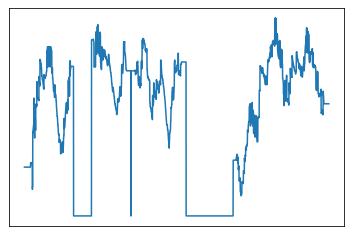

In [6]:
data = np.genfromtxt('data/laser_faulty.log')
data = np.mean(data, axis=1)
ax = plt.axes()
ax.plot(data)
ax.tick_params(which='major', width=0, length=0)
plt.setp(ax.get_xmajorticklabels(), visible=False)
plt.setp(ax.get_ymajorticklabels(), visible=False)
plt.show()

# More time series

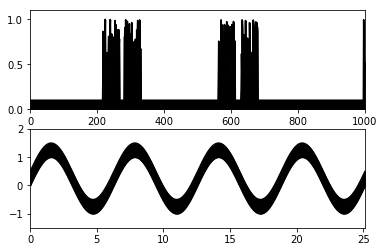

In [7]:
data = 0.1 * np.ones(1000)
for i in xrange(5):
    idx = np.random.randint(0,1000)
    if (idx + 50) <= 1000:
        data[idx:idx+50] = np.random.uniform(0.2, 1, 50)
    else:
        l = 1000 - idx
        data[idx:] = np.random.uniform(0.2, 1, l)
fig = plt.figure(1)
ax1 = fig.add_subplot(2,1,1)
ax1.plot(data, color='k')
ax1.fill_between(np.arange(0, len(data)), data, color='k')
ax1.set_xlim([0, len(data)])
ax1.set_ylim([0, 1.1])

x = np.linspace(0, 8*np.pi, 1000)
y1 = np.sin(x)
y2 = np.sin(x) + 0.5
ax2 = fig.add_subplot(2,1,2)
ax2.plot(x, y1, color='k')
ax2.plot(x, y2, color='k')
ax2.fill_between(x, y1, y2, color='k')
ax2.set_xlim([0, 8*np.pi])
ax2.set_ylim([-1.5, 2.])
plt.show()

# Box plot

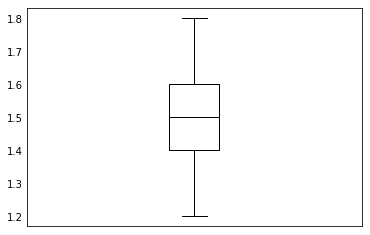

In [8]:
# Data taken from "Schaum's Outline of Elements of Statistics I - Descriptive Statistics and Probability" by Bernstein
data = np.array([1.2, 1.2, 1.3, 1.3, 1.3, 1.3, 1.3, 1.3, 1.3, 1.4, 1.4, 1.4, 1.4, 1.4, 1.4, 1.4, 1.4, 1.4, 1.4,\
1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.6, 1.6, 1.6, 1.6, 1.6, 1.6, 1.6, 1.6, 1.6, 1.6,\
1.7, 1.7, 1.7, 1.7, 1.7, 1.7, 1.7, 1.8, 1.8])

ax = plt.gca()
bp = ax.boxplot(data)
ax.tick_params(which='major', width=0, length=0)
plt.setp(ax.get_xmajorticklabels(), visible=False)
plt.setp(bp['boxes'], color='k')
plt.setp(bp['whiskers'], color='k')
plt.setp(bp['medians'], color='k')
plt.show()

# Cheaper box plot

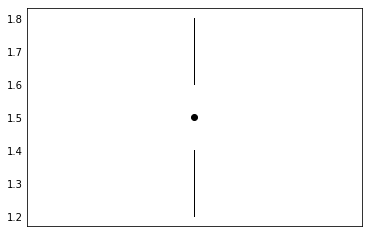

In [9]:
# Data taken from "Schaum's Outline of Elements of Statistics I - Descriptive Statistics and Probability" by Bernstein
data = np.array([1.2, 1.2, 1.3, 1.3, 1.3, 1.3, 1.3, 1.3, 1.3, 1.4, 1.4, 1.4, 1.4, 1.4, 1.4, 1.4, 1.4, 1.4, 1.4,\
1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.6, 1.6, 1.6, 1.6, 1.6, 1.6, 1.6, 1.6, 1.6, 1.6,\
1.7, 1.7, 1.7, 1.7, 1.7, 1.7, 1.7, 1.8, 1.8])

ax = plt.gca()
bp = ax.boxplot(data)
ax.tick_params(which='major', width=0, length=0)
plt.setp(ax.get_xmajorticklabels(), visible=False)
plt.setp(bp['boxes'], visible=False)
plt.setp(bp['caps'], visible=False)
plt.setp(bp['medians'], visible=False)
plt.setp(bp['whiskers'], color='k')
plt.plot([1], [np.average(data)], marker='o', color='k', markeredgecolor='k')
plt.show()

# Notched box plot

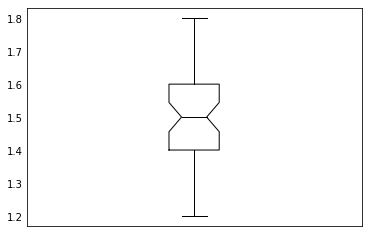

In [10]:
# Data taken from "Schaum's Outline of Elements of Statistics I - Descriptive Statistics and Probability" by Bernstein
data = np.array([1.2, 1.2, 1.3, 1.3, 1.3, 1.3, 1.3, 1.3, 1.3, 1.4, 1.4, 1.4, 1.4, 1.4, 1.4, 1.4, 1.4, 1.4, 1.4,\
1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.5, 1.6, 1.6, 1.6, 1.6, 1.6, 1.6, 1.6, 1.6, 1.6, 1.6,\
1.7, 1.7, 1.7, 1.7, 1.7, 1.7, 1.7, 1.8, 1.8])

ax = plt.gca()
bp = ax.boxplot(data, notch=1)
ax.tick_params(which='major', width=0, length=0)
plt.setp(ax.get_xmajorticklabels(), visible=False)
plt.setp(bp['boxes'], color='k')
plt.setp(bp['whiskers'], color='k')
plt.setp(bp['medians'], color='k')
plt.show()

# Bar chart

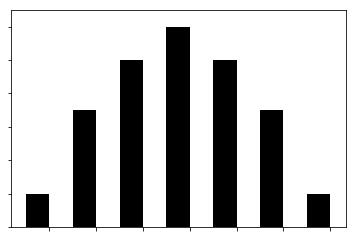

In [11]:
# Data taken from "Schaum's Outline of Elements of Statistics I - Descriptive Statistics and Probability" by Bernstein
data = np.array([[1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8], [2, 7, 10, 12, 10, 7, 2]])
ax = plt.gca()
ax.bar(data[0]-0.025, data[1], width=0.05, color='k')
plt.setp(ax.get_xmajorticklabels(), visible=False)
plt.setp(ax.get_ymajorticklabels(), visible=False)
plt.ylim([0, 13])
plt.show()

# Bar chart without top and right axes

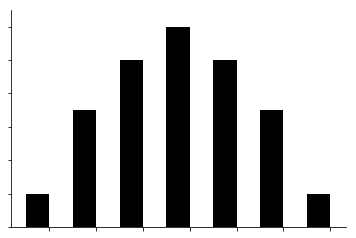

In [12]:
# Data taken from "Schaum's Outline of Elements of Statistics I - Descriptive Statistics and Probability" by Bernstein
data = np.array([[1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8], [2, 7, 10, 12, 10, 7, 2]])
ax = plt.gca()
ax.bar(data[0]-0.025, data[1], width=0.05, color='k')
ax.xaxis.tick_bottom()
ax.yaxis.tick_left()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.ylim([0, 13])
plt.setp(ax.get_xmajorticklabels(), visible=False)
plt.setp(ax.get_ymajorticklabels(), visible=False)
plt.show()

# Bar chart without axes

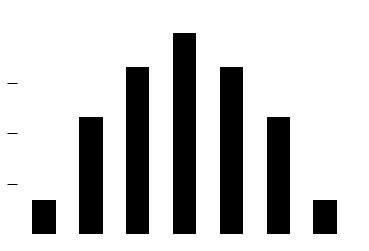

In [13]:
# Data taken from "Schaum's Outline of Elements of Statistics I - Descriptive Statistics and Probability" by Bernstein
data = np.array([[1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8], [2, 7, 10, 12, 10, 7, 2]])
ax = plt.gca()
ax.bar(data[0]-0.025, data[1], width=0.05, color='k')
ax.tick_params(which='minor', width=1, length=10)
ax.tick_params(which='major', width=0, length=0)
ax.xaxis.tick_bottom()
ax.yaxis.tick_left()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.set_yticks([3, 6, 9], minor=True)
plt.ylim([0, 13])
plt.setp(ax.get_xmajorticklabels(), visible=False)
plt.setp(ax.get_ymajorticklabels(), visible=False)
plt.show()

# Bar chart with bar marks

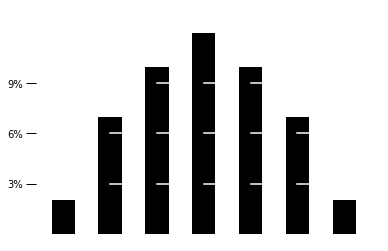

In [14]:
# Data taken from "Schaum's Outline of Elements of Statistics I - Descriptive Statistics and Probability" by Bernstein
data = np.array([[1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8], [2, 7, 10, 12, 10, 7, 2]])
ax = plt.gca()
ax.bar(data[0]-0.025, data[1], width=0.05, color='k')
for i, x in enumerate(data[0]):
    y = data[1,i]
    c = 3
    while c < y:
        ax.plot([x-0.025, x+0.025], [c, c], "w-")
        c += 3
ax.tick_params(which='minor', width=1, length=10)
ax.tick_params(which='major', width=0, length=0)
ax.xaxis.tick_bottom()
ax.yaxis.tick_left()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.set_yticks([3, 6, 9], minor=True)
ax.set_yticklabels(['3%', '6%', '9%'], minor=True)
plt.ylim([0, 13])
plt.setp(ax.get_xmajorticklabels(), visible=False)
plt.setp(ax.get_ymajorticklabels(), visible=False)
plt.show()

# Scatter plot

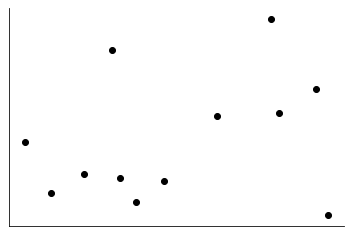

In [15]:
data = np.random.uniform(0, 5, (2,12))
ax = plt.gca()
ax.scatter(data[0], data[1], color='k')
ax.xaxis.tick_bottom()
ax.yaxis.tick_left()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.tick_params(which='major', width=0, length=0)
plt.setp(ax.get_xmajorticklabels(), visible=False)
plt.setp(ax.get_ymajorticklabels(), visible=False)
plt.show()

# Scatter plot with a range frame

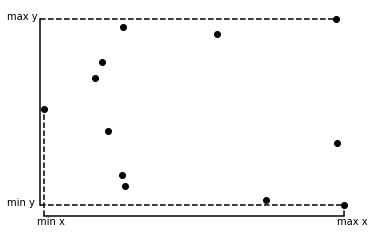

In [16]:
data = np.random.uniform(0, 5, (2,12))
ax = plt.gca()
ax.scatter(data[0], data[1], color='k')
min_x = np.min(data[0])
max_x = np.max(data[0])
min_y = np.min(data[1])
max_y = np.max(data[1])
argmin_x = np.argmin(data[0])
argmax_x = np.argmax(data[0])
argmin_y = np.argmin(data[1])
argmax_y = np.argmax(data[1])

ax.plot([min_x, min_x], [0, data[1, argmin_x]], 'k--')
ax.plot([max_x, max_x], [0, data[1, argmax_x]], 'k--')
ax.plot([0, data[0, argmin_y]], [min_y, min_y], 'k--')
ax.plot([0, data[0, argmax_y]], [max_y, max_y], 'k--')
ax.plot([min_x, max_x], [0, 0], 'k-')
ax.plot([0, 0], [min_y, max_y], 'k-')
ax.text(min_x-0.1, -0.2, 'min x')
ax.text(max_x-0.1, -0.2, 'max x')
ax.text(-0.5, min_y, 'min y')
ax.text(-0.5, max_y, 'max y')

ax.xaxis.tick_bottom()
ax.yaxis.tick_left()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.tick_params(which='major', width=0, length=0)
plt.setp(ax.get_xmajorticklabels(), visible=False)
plt.setp(ax.get_ymajorticklabels(), visible=False)
plt.show()

# Dot dash plot

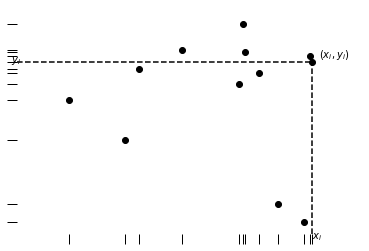

In [17]:
data = np.random.uniform(0, 5, (2,12))
ax = plt.gca()
ax.scatter(data[0], data[1], color='k')
idx = np.random.randint(0, 12)
ax.plot([data[0, idx], data[0, idx]], [0, data[1, idx]], 'k--')
ax.plot([0, data[0, idx]], [data[1, idx], data[1, idx]], 'k--')
ax.text(data[0, idx]+0.1, data[1, idx]+0.1, '($x_i, y_i$)')
ax.text(data[0, idx], -0.1, '$x_i$')
ax.text(-0.1, data[1, idx], '$y_i$')

ax.set_xticks(data[0], minor=True)
ax.set_yticks(data[1], minor=True)
ax.xaxis.tick_bottom()
ax.yaxis.tick_left()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
plt.tick_params(which='minor', width=1, length=10)
plt.tick_params(which='major', width=0, length=0)
plt.tick_params(labelbottom=False, labelleft=False)
plt.xlim([0, 5.1])
plt.ylim([0, 5.1])
plt.show()

# Graph

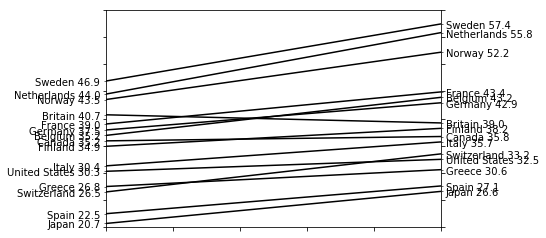

In [18]:
data = np.array([[20.7, 22.5, 26.5, 27.5, 30.3, 31.3, 34.9, 35.9, 36.9, 37.9, 39.0, 40.7, 43.5, 44.5, 46.9], [26.6, 27.6, 33.5, 30.6, 32.5, 35.7, 38.2, 36.7, 43.9, 42.9, 44.9, 39.2, 52.2, 55.8, 57.4]])

ax1 = plt.axes()
ax1.set_xlim([0, 1])
ax1.set_ylim([20, 60])
for i in xrange(len(data[0])):
    ax1.plot([0, 1], [data[0, i], data[1, i]], 'k-')

ax1.set_yticks(data[0], minor=True)
ax1.set_yticklabels(['Japan 20.7', 'Spain 22.5', 'Switzerland 26.5', 'Greece 26.8', 'United States 30.3', 'Italy 30.4', 'Finland 34.9', 'Canada 35.2', 'Belgium 35.2', 'Germany 37.5', 'France 39.0', 'Britain 40.7', 'Norway 43.5', 'Netherlands 44.0', 'Sweden 46.9'], minor=True)
ax1.xaxis.tick_bottom()
ax1.yaxis.tick_left()
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['bottom'].set_visible(False)
ax1.spines['left'].set_visible(False)

ax2 = ax1.twinx()
ax2.set_ylim([20, 60])
ax2.set_yticks(data[1], minor=True)
ax2.set_yticklabels(['Japan 26.6', 'Spain 27.1', 'Switzerland 33.2', 'Greece 30.6', 'United States 32.5', 'Italy 35.7', 'Finland 38.2', 'Canada 35.8', 'Belgium 43.2', 'Germany 42.9', 'France 43.4', 'Britain 39.0', 'Norway 52.2', 'Netherlands 55.8', 'Sweden 57.4'], minor=True)

plt.setp(ax1.get_xmajorticklabels(), visible=False)
plt.setp(ax1.get_ymajorticklabels(), visible=False)
plt.setp(ax2.get_ymajorticklabels(), visible=False)
plt.show()

# Multivariable scatter plot

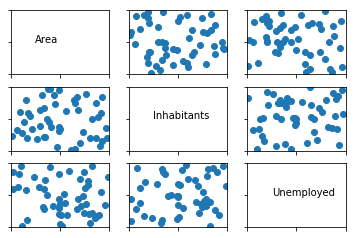

In [19]:
n = 50
d = 3
var_names = ['Area', 'Inhabitants', 'Unemployed']
data = np.random.rand(n, d)
fig = plt.figure(1)
subplot_counter = 1
for i in xrange(d):
    for j in xrange(d):
        fig.add_subplot(3, 3, subplot_counter)
        plt.tick_params(labelbottom=False, labelleft=False)
        plt.xlim([0,1])
        plt.ylim([0,1])
        if i != j:
            plt.scatter(data[:,i], data[:,j])
        else:
            plt.text(0.25, 0.5, var_names[i])
        subplot_counter += 1
plt.show()

# Chord diagram (example taken from https://plot.ly/python/filled-chord-diagram/)

In [20]:
data = [['', 'Emma', 'Isabella', 'Ava', 'Olivia', 'Sophia', 'row-sum'],
        ['Emma', 16, 3, 28, 0, 18, 65],
        ['Isabella', 18, 0, 12, 5, 29, 64],
        ['Ava', 9, 11, 17, 27, 0, 64],  
        ['Olivia', 19, 0, 31, 11, 12, 73],
        ['Sophia', 23, 17, 10, 0, 34, 84]]

matrix=np.array([[16,  3, 28,  0, 18],
                 [18,  0, 12,  5, 29],
                 [ 9, 11, 17, 27,  0],  
                 [19,  0, 31, 11, 12],
                 [23, 17, 10,  0, 34]], dtype=int)

def check_data(data_matrix):
    L, M=data_matrix.shape
    if L!=M:
        raise ValueError('Data array must have (n,n) shape')
    return L

L=check_data(matrix)
def moduloAB(x, a, b):
        if a>=b:
            raise ValueError('Incorrect interval ends')
        y=(x-a)%(b-a)
        return y+b if y<0 else y+a
    
def test_2PI(x):
    return 0<= x <2*np.pi
row_sum=[np.sum(matrix[k,:]) for k in range(L)]

gap=2*np.pi*0.005
ideogram_length=2*np.pi*np.asarray(row_sum)/sum(row_sum)-gap*np.ones(L)
def get_ideogram_ends(ideogram_len, gap):
    ideo_ends=[]
    left=0
    for k in range(len(ideogram_len)):
        right=left+ideogram_len[k]
        ideo_ends.append([left, right])   
        left=right+gap
    return ideo_ends 

ideo_ends=get_ideogram_ends(ideogram_length, gap)
def make_ideogram_arc(R, phi, a=50):
    if not test_2PI(phi[0]) or not test_2PI(phi[1]):
        phi=[moduloAB(t, 0, 2*np.pi) for t in phi]
    length=(phi[1]-phi[0])% 2*np.pi 
    nr=5 if length<=np.pi/4 else int(a*length/np.pi)

    if phi[0] < phi[1]:   
        theta=np.linspace(phi[0], phi[1], nr)
    else:
        phi=[moduloAB(t, -np.pi, np.pi) for t in phi]
        theta=np.linspace(phi[0], phi[1], nr)
    return R*np.exp(1j*theta)

z=make_ideogram_arc(1.3, [11*np.pi/6, np.pi/17])
labels=['Emma', 'Isabella', 'Ava', 'Olivia', 'Sophia']
ideo_colors=['rgba(244, 109, 67, 0.75)',
             'rgba(253, 174, 97, 0.75)',
             'rgba(254, 224, 139, 0.75)',
             'rgba(217, 239, 139, 0.75)',
             'rgba(166, 217, 106, 0.75)']
def map_data(data_matrix, row_value, ideogram_length):
    mapped=np.zeros(data_matrix.shape)
    for j  in range(L):
        mapped[:, j]=ideogram_length*data_matrix[:,j]/row_value
    return mapped 

mapped_data=map_data(matrix, row_sum, ideogram_length)
idx_sort=np.argsort(mapped_data, axis=1)
idx_sort
def make_ribbon_ends(mapped_data, ideo_ends,  idx_sort):
    L=mapped_data.shape[0]
    ribbon_boundary=np.zeros((L,L+1))
    for k in range(L):
        start=ideo_ends[k][0]
        ribbon_boundary[k][0]=start
        for j in range(1,L+1):
            J=idx_sort[k][j-1]
            ribbon_boundary[k][j]=start+mapped_data[k][J]
            start=ribbon_boundary[k][j]
    return [[(ribbon_boundary[k][j],ribbon_boundary[k][j+1] ) for j in range(L)] for k in range(L)]   

ribbon_ends=make_ribbon_ends(mapped_data, ideo_ends,  idx_sort)
def control_pts(angle, radius):
    if len(angle)!=3:
        raise InvalidInputError('angle must have len =3')
    b_cplx=np.array([np.exp(1j*angle[k]) for k in range(3)])
    b_cplx[1]=radius*b_cplx[1]
    return zip(b_cplx.real, b_cplx.imag)

def ctrl_rib_chords(l, r, radius):
    if len(l)!=2 or len(r)!=2:
        raise ValueError('the arc ends must be elements in a list of len 2')
    return [control_pts([l[j], (l[j]+r[j])/2, r[j]], radius) for j in range(2)]

ribbon_color=[L*[ideo_colors[k]] for k in range(L)]
ribbon_color[0][4]=ideo_colors[4]
ribbon_color[1][2]=ideo_colors[2]
ribbon_color[2][3]=ideo_colors[3]
ribbon_color[2][4]=ideo_colors[4]
def make_q_bezier(b):
    if len(b)!=3:
        raise valueError('control poligon must have 3 points')
    A, B, C=b    
    return 'M '+str(A[0])+',' +str(A[1])+' '+'Q '+\
                str(B[0])+', '+str(B[1])+ ' '+\
                str(C[0])+', '+str(C[1])
        
b=[(1,4), (-0.5, 2.35), (3.745, 1.47)]

make_q_bezier(b)
def make_ribbon_arc(theta0, theta1):
    if test_2PI(theta0) and test_2PI(theta1):
        if theta0 < theta1:
            theta0= moduloAB(theta0, -np.pi, np.pi)
            theta1= moduloAB(theta1, -np.pi, np.pi)
            if theta0*theta1>0:
                raise ValueError('incorrect angle coordinates for ribbon')
    
        nr=int(40*(theta0-theta1)/np.pi)
        if nr<=2: nr=3
        theta=np.linspace(theta0, theta1, nr)
        pts=np.exp(1j*theta)
    
        string_arc=''
        for k in range(len(theta)):
            string_arc+='L '+str(pts.real[k])+', '+str(pts.imag[k])+' '
        return   string_arc 
    else:
        raise ValueError('the angle coordinates for an arc side of a ribbon must be in [0, 2*pi]')
        
make_ribbon_arc(np.pi/3, np.pi/6)
def make_layout(title, plot_size):
    axis=dict(showline=False,
          zeroline=False,
          showgrid=False,
          showticklabels=False,
          title='' 
          )

    return Layout(title=title,
                  xaxis=XAxis(axis),
                  yaxis=YAxis(axis),
                  showlegend=False,
                  width=plot_size,
                  height=plot_size,
                  margin=Margin(t=25, b=25, l=25, r=25),
                  hovermode='closest',
                  shapes=[]
                 )

def make_ideo_shape(path, line_color, fill_color):
    return  dict(
                  line=Line(
                  color=line_color, 
                  width=0.45
                 ),

            path=  path,
            type='path',
            fillcolor=fill_color,    
        )

def make_ribbon(l, r, line_color, fill_color, radius=0.2):
    poligon=ctrl_rib_chords(l,r, radius)
    b,c =poligon  
           
    return  dict(
                line=Line(
                color=line_color, width=0.5
            ),
            path=  make_q_bezier(b)+make_ribbon_arc(r[0], r[1])+
                   make_q_bezier(c[::-1])+make_ribbon_arc(l[1], l[0]),
            type='path',
            fillcolor=fill_color,    
        )

def make_self_rel(l, line_color, fill_color, radius):
    b=control_pts([l[0], (l[0]+l[1])/2, l[1]], radius) 
    return  dict(
                line=Line(
                color=line_color, width=0.5
            ),
            path=  make_q_bezier(b)+make_ribbon_arc(l[1], l[0]),
            type='path',
            fillcolor=fill_color,    
        )

def invPerm(perm):
    inv = [0] * len(perm)
    for i, s in enumerate(perm):
        inv[s] = i
    return inv

layout=make_layout('Chord diagram', 400)
radii_sribb=[0.4, 0.30, 0.35, 0.39, 0.12]

ribbon_info=[]
for k in range(L):
    sigma=idx_sort[k]
    sigma_inv=invPerm(sigma)
    for j in range(k, L):
        if matrix[k][j]==0 and matrix[j][k]==0: continue
        eta=idx_sort[j]
        eta_inv=invPerm(eta)
        l=ribbon_ends[k][sigma_inv[j]]  
        
        if j==k:
            layout['shapes'].append(make_self_rel(l, 'rgb(175,175,175)' ,
                                    ideo_colors[k], radius=radii_sribb[k])) 
            z=0.9*np.exp(1j*(l[0]+l[1])/2)
            text=labels[k]+' commented on '+ '{:d}'.format(matrix[k][k])+' of '+ 'herself Fb posts',
            ribbon_info.append(Scatter(x=z.real,
                                       y=z.imag,
                                       mode='markers',
                                       marker=Marker(size=0.5, color=ideo_colors[k]),
                                       text=text,
                                       hoverinfo='text'
                                       )
                              )
        else:
            r=ribbon_ends[j][eta_inv[k]]
            zi=0.9*np.exp(1j*(l[0]+l[1])/2)
            zf=0.9*np.exp(1j*(r[0]+r[1])/2)
            texti=labels[k]+' commented on '+ '{:d}'.format(matrix[k][j])+' of '+\
                  labels[j]+ ' Fb posts',
            
            textf=labels[j]+' commented on '+ '{:d}'.format(matrix[j][k])+' of '+\
            labels[k]+ ' Fb posts',
            ribbon_info.append(Scatter(x=zi.real,
                                       y=zi.imag,
                                       mode='markers',
                                       marker=Marker(size=0.5, color=ribbon_color[k][j]),
                                       text=texti,
                                       hoverinfo='text'
                                       )
                              ),
            ribbon_info.append(Scatter(x=zf.real,
                                       y=zf.imag,
                                       mode='markers',
                                       marker=Marker(size=0.5, color=ribbon_color[k][j]),
                                       text=textf,
                                       hoverinfo='text'
                                       )
                              )
            r=(r[1], r[0])#IMPORTANT!!!  Reverse these arc ends because otherwise you get a twisted ribbon
            layout['shapes'].append(make_ribbon(l, r, 'rgb(175,175,175)' , ribbon_color[k][j]))

ideograms=[]
for k in range(len(ideo_ends)):
    z= make_ideogram_arc(1.1, ideo_ends[k])
    zi=make_ideogram_arc(1.0, ideo_ends[k])
    m=len(z)
    n=len(zi)
    ideograms.append(Scatter(x=z.real,
                             y=z.imag,
                             mode='lines',
                             line=Line(color=ideo_colors[k], shape='spline', width=0.25),
                             text=labels[k]+'<br>'+'{:d}'.format(row_sum[k]), 
                             hoverinfo='text'
                             )
                     )
    
       
    path='M '
    for s in range(m):
        path+=str(z.real[s])+', '+str(z.imag[s])+' L '
        
    Zi=np.array(zi.tolist()[::-1]) 

    for s in range(m):
        path+=str(Zi.real[s])+', '+str(Zi.imag[s])+' L '
    path+=str(z.real[0])+' ,'+str(z.imag[0]) 
   
    layout['shapes'].append(make_ideo_shape(path,'rgb(150,150,150)' , ideo_colors[k]))

data = Data(ideograms+ribbon_info)
fig = Figure(data=data, layout=layout)
iplot(fig)

# Spider chart (example adapted from http://matplotlib.org/examples/api/radar_chart.html)

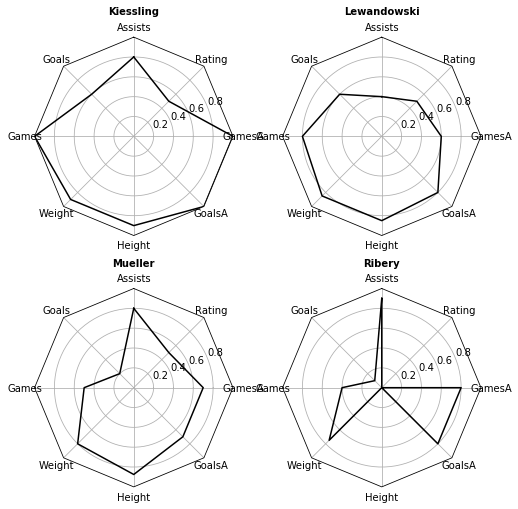

In [21]:
def radar_factory(num_vars, frame='circle'):
    theta = np.linspace(0, 2*np.pi, num_vars, endpoint=False)
    theta += np.pi/2

    def draw_poly_patch(self):
        verts = unit_poly_verts(theta)
        return plt.Polygon(verts, closed=True, edgecolor='k')

    def draw_circle_patch(self):
        return plt.Circle((0.5, 0.5), 0.5)

    patch_dict = {'polygon': draw_poly_patch, 'circle': draw_circle_patch}
    if frame not in patch_dict:
        raise ValueError('unknown value for `frame`: %s' % frame)

    class RadarAxes(PolarAxes):
        name = 'radar'
        RESOLUTION = 1
        draw_patch = patch_dict[frame]

        def fill(self, *args, **kwargs):
            closed = kwargs.pop('closed', True)
            return super(RadarAxes, self).fill(closed=closed, *args, **kwargs)

        def plot(self, *args, **kwargs):
            lines = super(RadarAxes, self).plot(*args, **kwargs)
            for line in lines:
                self._close_line(line)

        def _close_line(self, line):
            x, y = line.get_data()
            if x[0] != x[-1]:
                x = np.concatenate((x, [x[0]]))
                y = np.concatenate((y, [y[0]]))
                line.set_data(x, y)

        def set_varlabels(self, labels):
            self.set_thetagrids(np.degrees(theta), labels)

        def _gen_axes_patch(self):
            return self.draw_patch()

        def _gen_axes_spines(self):
            if frame == 'circle':
                return PolarAxes._gen_axes_spines(self)

            spine_type = 'circle'
            verts = unit_poly_verts(theta)
            verts.append(verts[0])
            path = Path(verts)

            spine = Spine(self, spine_type, path)
            spine.set_transform(self.transAxes)
            return {'polar': spine}

    register_projection(RadarAxes)
    return theta

def unit_poly_verts(theta):
    x0, y0, r = [0.5] * 3
    verts = [(r*np.cos(t) + x0, r*np.sin(t) + y0) for t in theta]
    return verts

data = [
    ['Assists', 'Goals', 'Games', 'Weight', 'Height', 'GoalsA', 'GamesA', 'Rating'],
    ('Kiessling', [.8, .6, 1., .9, .9, 1., 1., .5]),
    ('Lewandowski', [.4, .6, .8, .85, .85, .8, .6, .5]),
    ('Mueller', [.8, .2, .5, .8, .875, .7, .7, .5]),
    ('Ribery', [.9, .1, .4, .75, 0., .8, .8, 0.])
]

N = 8
theta = radar_factory(N, frame='polygon')
spoke_labels = data.pop(0)

fig = plt.figure(figsize=(8, 8))
fig.subplots_adjust(wspace=0.25, hspace=0.20, top=0.85, bottom=0.05)

colors = ['b', 'r', 'g', 'm', 'y']
for n, (title, case_data) in enumerate(data):
    ax = fig.add_subplot(2, 2, n + 1, projection='radar')
    plt.rgrids([0.2, 0.4, 0.6, 0.8])
    ax.set_title(title, weight='bold', size='medium', position=(0.5, 1.1),
                 horizontalalignment='center', verticalalignment='center')
    ax.plot(theta, case_data, color='k')
    ax.fill(theta, case_data, facecolor='w', alpha=0.25)
    ax.set_varlabels(spoke_labels)
    ax.set_ylim([0,1])

plt.show()

# Nightingale chart

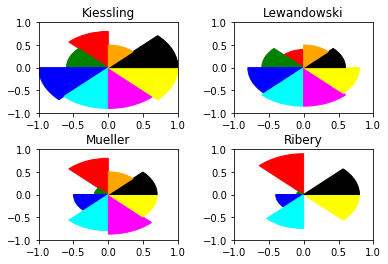

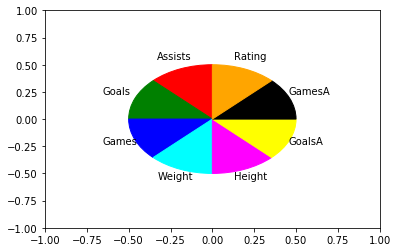

In [22]:
data = np.array([[.8, .6, 1., .9, .9, 1., 1., .5],
                 [.4, .6, .8, .85, .85, .8, .6, .5],
                 [.8, .2, .5, .8, .875, .7, .7, .5],
                 [.9, .1, .4, .75, 0., .8, .8, 0.]])
titles = ['Kiessling', 'Lewandowski', 'Mueller', 'Ribery']
legend = ['Assists', 'Goals', 'Games', 'Weight', 'Height', 'GoalsA', 'GamesA', 'Rating']
colors = ['red', 'green', 'blue', 'cyan', 'magenta', 'yellow', 'black', 'orange']

patches_count = data.shape[1]
theta1 = list()
theta2 = list()
patch_angle_increment = 360. / data.shape[1]
angle = 0.
for _ in xrange(patches_count):
    theta1.append(angle)
    theta2.append(angle + patch_angle_increment)
    angle += patch_angle_increment
theta1 = np.array(theta1) + 90
theta2 = np.array(theta2) + 90

fig = plt.figure(1)
for i in xrange(data.shape[0]):
    ax = fig.add_subplot(2, 2, i+1)
    plt.title(titles[i])
    for j, r in enumerate(data[i]):
        section = Wedge((0, 0), r, theta1[j], theta2[j], color=colors[j])
        ax.add_patch(section)
    ax.set_xlim([-1,1])
    ax.set_ylim([-1,1])
plt.subplots_adjust(wspace=0.4,hspace=0.4)

fig = plt.figure(2)
ax = fig.add_subplot(1,1,1)
for j in xrange(data.shape[1]):
    section = Wedge((0, 0), .5, theta1[j], theta2[j], color=colors[j])
    x = .6 * np.cos(np.radians((theta1[j] + theta2[j]) / 2.)) - .1
    y = .6 * np.sin(np.radians((theta1[j] + theta2[j]) / 2.))
    ax.text(x, y, legend[j])
    ax.add_patch(section)
ax.set_xlim([-1,1])
ax.set_ylim([-1,1])

plt.show()

# Heatmap

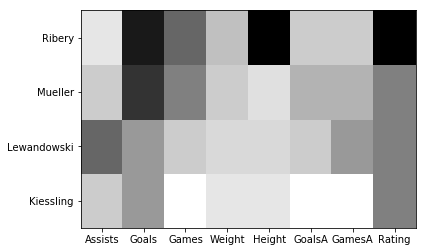

In [23]:
data = np.array([[.8, .6, 1., .9, .9, 1., 1., .5],
                 [.4, .6, .8, .85, .85, .8, .6, .5],
                 [.8, .2, .5, .8, .875, .7, .7, .5],
                 [.9, .1, .4, .75, 0., .8, .8, 0.]])
cols = ['Assists', 'Goals', 'Games', 'Weight', 'Height', 'GoalsA', 'GamesA', 'Rating']
rows = ['Kiessling', 'Lewandowski', 'Mueller', 'Ribery']
ax = plt.gca()
ax.pcolor(data, cmap=plt.cm.gray)
ax.set_yticks(np.arange(data.shape[0])+0.5)
ax.set_xticks(np.arange(data.shape[1])+0.5)
ax.set_xticklabels(cols)
ax.set_yticklabels(rows)
plt.show()